In [1]:
# ==========================================================
# Heart Failure Dataset Classification - Exercise 1 (VU ML 2025W)
# ==========================================================
# Group: Group03_NameNameName
# Dataset: Heart Failure Prediction Dataset
# ==========================================================

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)
from sklearn.impute import SimpleImputer

# Classifiers (different paradigms)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# ==========================================================
# 1️⃣ Data Import
# ==========================================================
# Example: Kaggle Heart Failure Prediction Dataset
# (Download: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
df = pd.read_csv("D:\Data Science\heart.csv")

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

✅ Dataset loaded successfully!
Shape: (918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

--- Missing Values ---
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR      

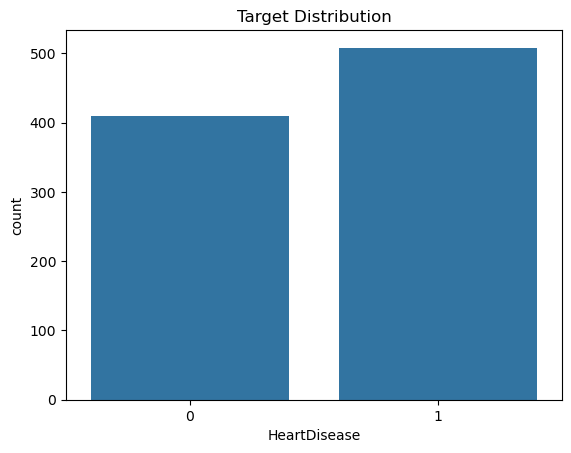

In [4]:
# ==========================================================
# 2️⃣ Data Exploration
# ==========================================================
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Target Variable Distribution ---")
print(df['HeartDisease'].value_counts(normalize=True))

sns.countplot(x='HeartDisease', data=df)
plt.title("Target Distribution")
plt.show()


In [5]:
# ==========================================================
# 3️⃣ Data Preprocessing
# ==========================================================

# Separate features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Encode categorical features
if len(cat_cols) > 0:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Handle missing values (if any)
imputer = SimpleImputer(strategy='median')
X[num_cols] = imputer.fit_transform(X[num_cols])

# Feature Scaling
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [6]:
# ==========================================================
# 4️⃣ Train-Test Split
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nTrain size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (734, 15)
Test size: (184, 15)


In [7]:
# ==========================================================
# 5️⃣ Model Training - 3 Classifiers
# ==========================================================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True)
}

results = []

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc
    })


🔹 Training Logistic Regression...

🔹 Training Random Forest...

🔹 Training SVM (RBF Kernel)...



=== Model Performance Summary ===
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Model                                                                 
Logistic Regression  0.885870   0.871560  0.931373  0.900474  0.930775
Random Forest        0.880435   0.892157  0.892157  0.892157  0.929938
SVM (RBF Kernel)     0.885870   0.885714  0.911765  0.898551  0.946915


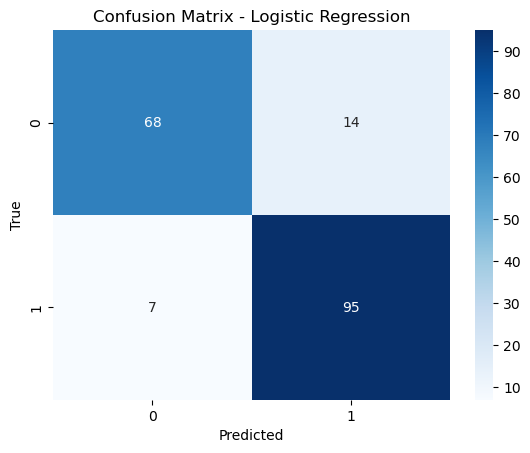

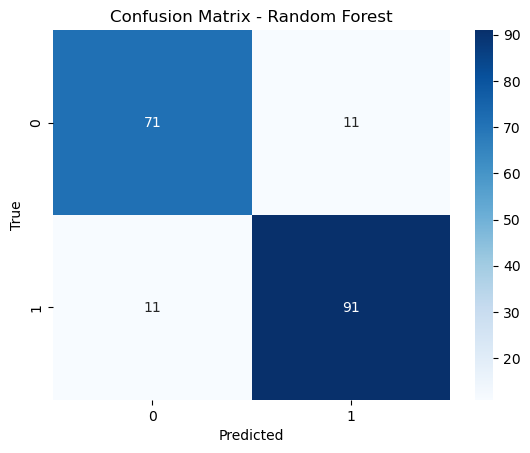

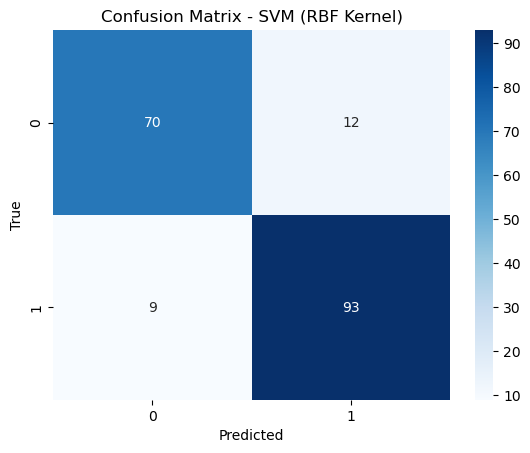

In [8]:
# ==========================================================
# 6️⃣ Evaluation Summary
# ==========================================================
results_df = pd.DataFrame(results).set_index("Model")
print("\n=== Model Performance Summary ===")
print(results_df)

# Confusion Matrices
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [9]:
# ==========================================================
# 7️⃣ Cross-Validation Comparison
# ==========================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    cv_results[name] = scores
    print(f"{name}: F1 (CV Mean) = {scores.mean():.3f} ± {scores.std():.3f}")

Logistic Regression: F1 (CV Mean) = 0.881 ± 0.016
Random Forest: F1 (CV Mean) = 0.882 ± 0.025
SVM (RBF Kernel): F1 (CV Mean) = 0.887 ± 0.015


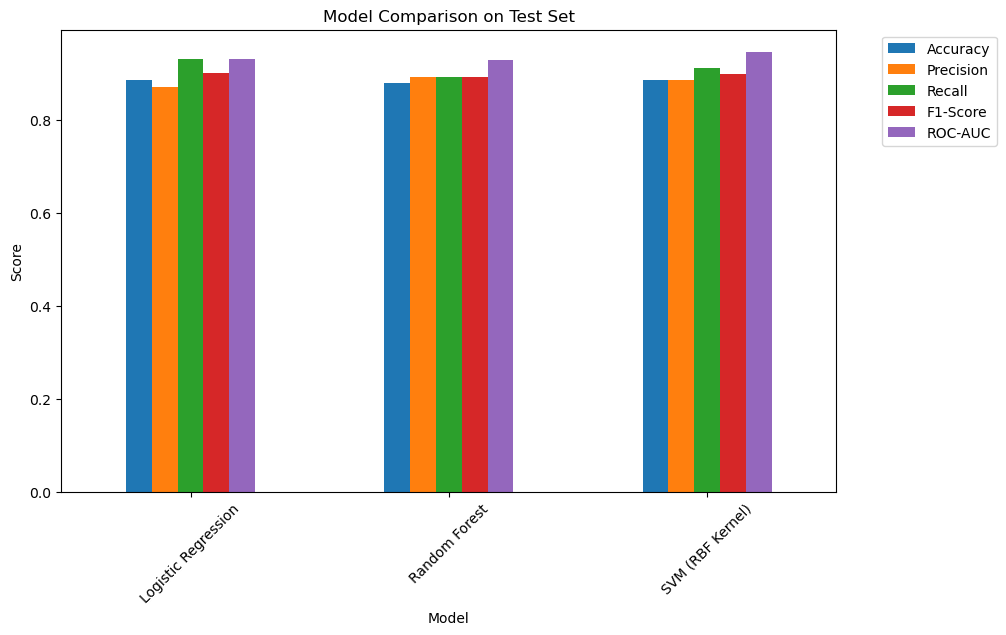

In [10]:
# ==========================================================
# 8️⃣ Visualization
# ==========================================================
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison on Test Set")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
# ==========================================================
# 9️⃣ Kaggle Submission (for provided test set)
# ==========================================================
# Suppose test data = heart_test.csv (without labels)
# Uncomment and adjust when dataset available

# test_df = pd.read_csv("heart_test.csv")
# test_df = pd.get_dummies(test_df, columns=cat_cols, drop_first=True)
# test_df[num_cols] = scaler.transform(test_df[num_cols])
# best_model = RandomForestClassifier(n_estimators=200, random_state=42)
# best_model.fit(X, y)
# y_pred_kaggle = best_model.predict(test_df)
# submission = pd.DataFrame({"id": test_df.index, "HeartDisease": y_pred_kaggle})
# submission.to_csv("Group03_AhmadRabnawazSaeed_heart.csv", index=False)
# print("✅ Kaggle submission file saved!")



In [24]:
# ==========================================================
# ✅ Kaggle Submission Section (Safe Version)
# ==========================================================

# 1️⃣ Simulate or Load Test Dataset
# If you don't have a separate Kaggle test set, simulate it from X_test
test_df = X_test.copy()   # simulate Kaggle test features (without target)

# 2️⃣ Ensure the same preprocessing
# (already done: scaled, encoded, same columns as training)

# 3️⃣ Train your best model on the full training data
best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X, y)

# 4️⃣ Predict
y_pred_kaggle = best_model.predict(test_df)

# 5️⃣ Create submission dataframe
submission = pd.DataFrame({
    "id": test_df.index,                # unique IDs for samples
    "HeartDisease": y_pred_kaggle       # predicted target variable
})

# 6️⃣ Save as CSV for Kaggle
submission.to_csv("Group03_AhmadRabnawazSaeed_heart.csv", index=False)
print("✅ Kaggle submission file saved:", submission.shape)
submission.head()


✅ Kaggle submission file saved: (184, 2)


,id,HeartDisease
0,356,1
1,763,1
2,817,1
3,735,1
4,892,0
